# GOOGLE PLAYSTORE DATA
### Complete EDA Analysis for Bignners to Advance  

## About Dataset

## Description
The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)


**Context** While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content** Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements** This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration** The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline

# 2. Data Loading and exploration and cleaning

↪ Load the csv file with the pandas

↪ creating the dataframe and understanding the data present in the dataset using pandas

↪ Dealing with the missing data, outliers and the incorrect records

In [44]:
df = pd.read_csv('./data/googleplaystore.csv')

- Viewing the first five Rows of the data

In [45]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [46]:
# set option to be  maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Hide all warnings
import warnings
warnings.filterwarnings('ignore')


In [47]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Unnamed: 13'],
      dtype='object')

In [48]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 10841
Number of columns: 14


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Unnamed: 13     0 non-null      float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [50]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [51]:
df.describe()

,Rating,Reviews,Unnamed: 13
count,9367.000000,1.084100e+04,0.0
mean,4.191513,4.441119e+05,NaN
std,0.515735,2.927629e+06,NaN
min,1.000000,0.000000e+00,NaN
25%,4.000000,3.800000e+01,NaN
50%,4.300000,2.094000e+03,NaN
75%,4.500000,5.476800e+04,NaN
max,5.000000,7.815831e+07,NaN


# How to make size a numeric value

In [52]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
34M                     63
3.7M                    63
32M                     63
3.0M                    62
3.8M                   

---
# Observation

1. "varies with device"
2. K
3. M
 ---  

In [53]:
df['Size'].isnull().sum()

np.int64(0)

- No Missing value in Size, we are good to go

Verify the number of values and 3 different kind of values

In [54]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [55]:
# find the values in size column which has 'KB' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [56]:
# find the values in size column which has 'varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [57]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

- We have 8830 values in M units
- We have 316 values in k units
- We have 1695 value in Varies with device

Let's convert the M and K units into bytes and then remove the M and K from the values and convert them into numeric data type.

In [58]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [59]:
df['Size'].value_counts()

Size
11534336.0     198
12582912.0     196
14680064.0     194
13631488.0     191
15728640.0     184
17825792.0     160
19922944.0     154
16777216.0     149
27262976.0     149
10485760.0     146
26214400.0     143
20971520.0     139
22020096.0     138
25165824.0     136
18874368.0     133
24117248.0     117
23068672.0     114
30408704.0     103
28311552.0      97
29360128.0      95
31457280.0      84
34603008.0      79
3460300.8       77
38797312.0      76
36700160.0      72
32505856.0      70
3040870.4       69
2411724.8       68
2621440.0       68
3565158.4       65
2936012.8       65
35651584.0      63
33554432.0      63
3879731.2       63
3984588.8       62
3145728.0       62
4089446.4       62
41943040.0      62
4194304.0       61
46137344.0      61
37748736.0      60
48234496.0      59
4404019.2       59
50331648.0      59
5242880.0       58
3774873.6       57
40894464.0      56
3250585.6       56
39845888.0      55
3355443.2       55
4508876.8       54
2831155.2       53
4299161

In [60]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [61]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [62]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8


- Let's have a look on the Installs column

In [63]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [64]:
df['Installs'].value_counts().sum()

np.int64(10841)

we have no missing in this column, we are go to next

# Install
1. Remove + sign
2. Remove ,
3. Convert an into int. 

In [65]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [66]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [67]:
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [68]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

- Let's verify if the dtypes has been changes and the + and , sign has been removed

In [69]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8


# Price Column

In [70]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

## we are going to remove $ sign

In [71]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [72]:
df['Price'] = df['Price'].apply(lambda x: int(float(x)))

In [73]:
df['Price'].dtype

dtype('int64')

In [74]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [75]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Unnamed: 13,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,0.0,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,0.961719,NaN,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.896201,NaN,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,NaN,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,NaN,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,NaN,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,NaN,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,NaN,100.000000


In [76]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0 $
Max price is: 400 $
Average price is: 0.9617193985794669 $


# 2.1. Descriptive Statistics

- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
- We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 78+ Millions, which is the range of reviews, and the mean is 444,111.93 which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.
Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

# Missing values

In [77]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 13       10841
Size_in_Mb         1695
Size_in_bytes      1695
Rating             1474
Current Ver           8
Android Ver           2
Category              1
Genres                1
Type                  1
App                   0
Reviews               0
Installs              0
Last Updated          0
Price                 0
Content Rating        0
dtype: int64

In [78]:
df.isnull().sum().sum()

np.int64(15718)

<Axes: >

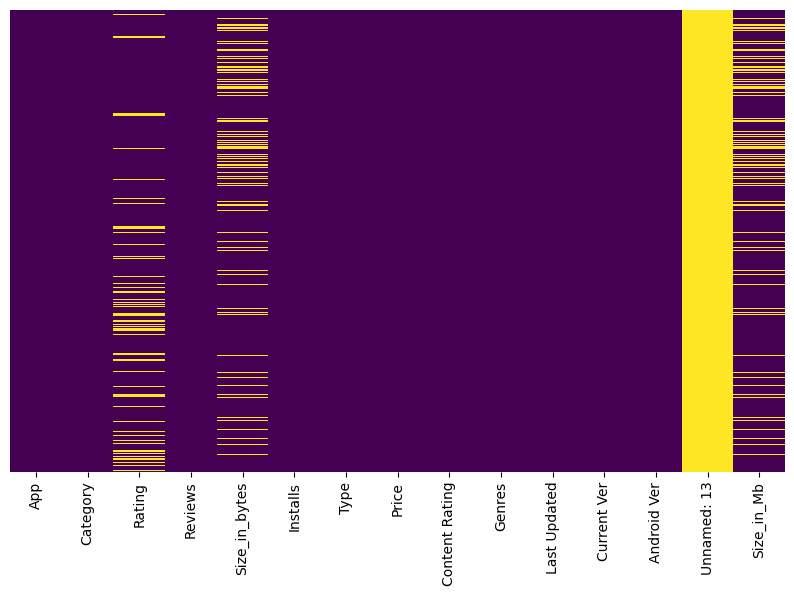

In [79]:
# plot the missing values in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [80]:
df['Unnamed: 13'].dtype

dtype('float64')

In [81]:
df.drop(columns=['Unnamed: 13'], inplace=True)

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

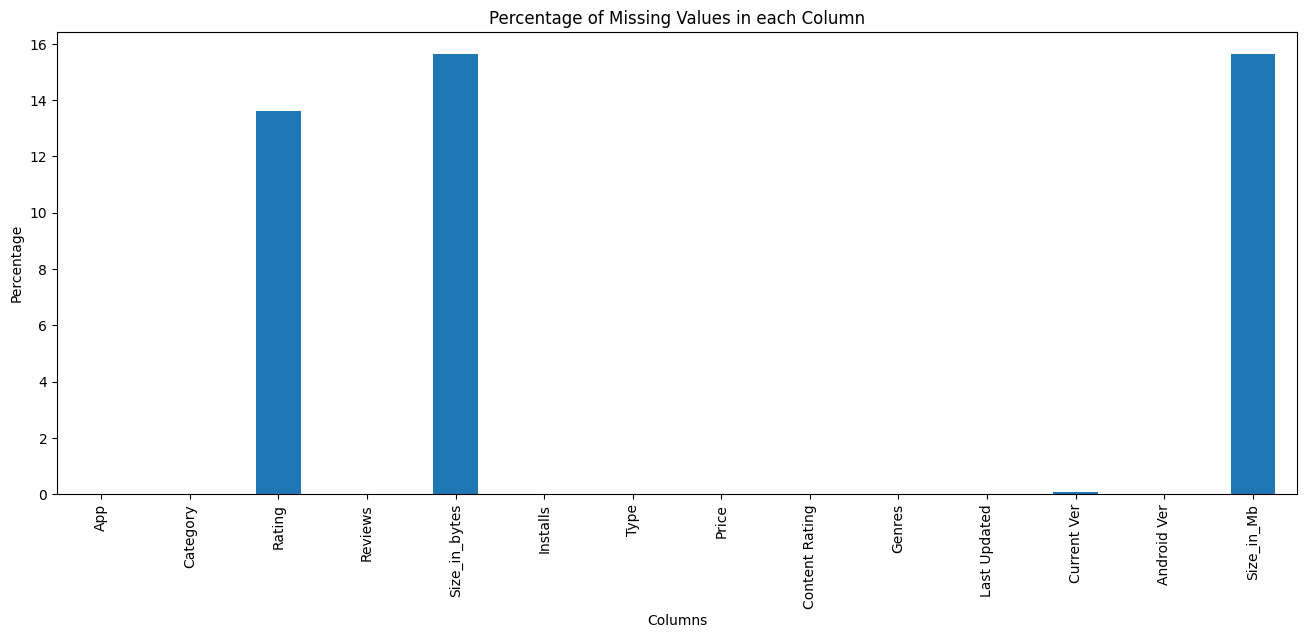

In [82]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

<Axes: >

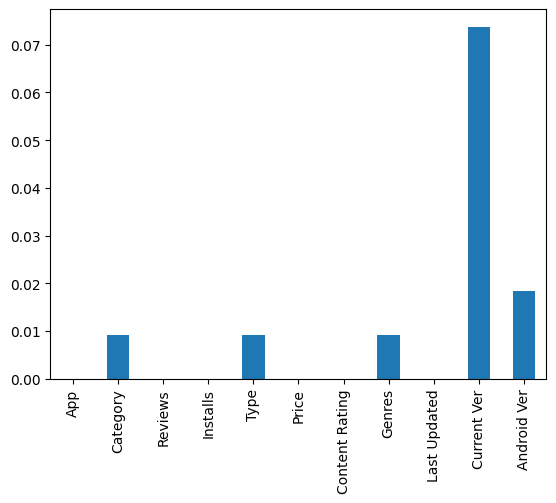

In [83]:
missing_percentage[missing_percentage < 1].plot(kind='bar')

In [84]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_bytes     1695
Size_in_Mb        1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Genres               1
Type                 1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [85]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size_in_bytes     15.635089
Size_in_Mb        15.635089
Rating            13.596532
Current Ver        0.073794
Android Ver        0.018448
Category           0.009224
Genres             0.009224
Type               0.009224
App                0.000000
Reviews            0.000000
Installs           0.000000
Price              0.000000
Content Rating     0.000000
Last Updated       0.000000
dtype: float64

# Observation:

- We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is 15.6% of the total - - values in the column.
- We have 1474 missing values in the 'Rating' column, which is 13.6% of the total values in the column.
- We have 8 missing value in the 'Current Ver' column, which is 0.07% of the total values in the column.
- We have 2 missing values in the 'Android Ver' column, which is 0.01% of the total values in the column.
- We have only 1 missing value in Category, Type and Genres columns, which is 0.009% of the total values in the column.

# 2.3. Dealing with the missing values

- We can not impute the Rating column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.

- Let's run the correlations

In [86]:
df.describe() # these are numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,0.961719,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.896201,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

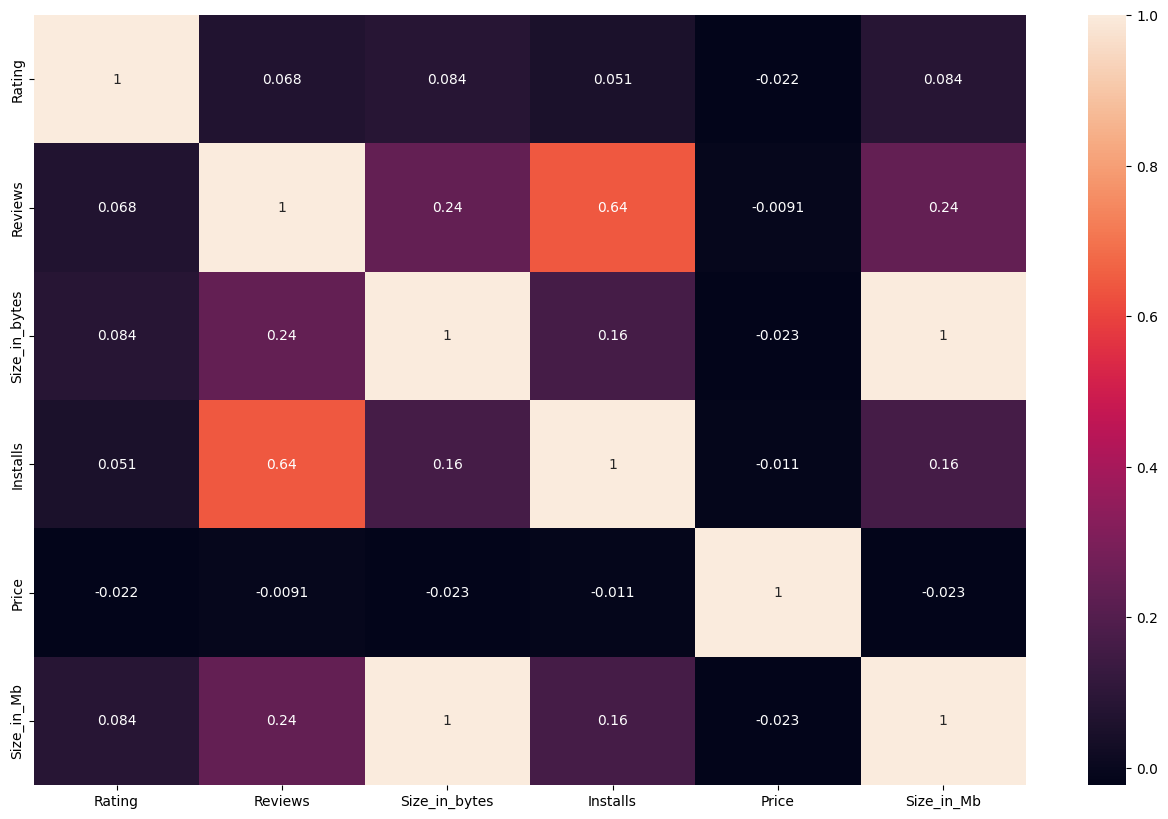

In [87]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [88]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.022486,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009091,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.022807,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.010982,0.164794
Price,-0.022486,-0.009091,-0.022807,-0.010982,1.000000,-0.022807
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.022807,1.000000


In [89]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


# Observations

---
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the Reviews column has a high correlation with the Installs column, which is 0.64 according to corr(). Which is quite good.
- This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
- If we have an ap with 2 installs and we imputer the reviews with 1000 or via average reviews then it will be wrong.
- Installs is slightly correlated with Size_in_Mb or Size_in_bytes , which is 0.16, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the Current Ver, Android Ver, Category, Type and Genres columns, as they are very less in number and will not affect our analysis.

In [90]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [91]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [92]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have removed 12 rows having null values in the Current Ver, Android Ver, Category, Type and Genres columns.

In [95]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1694
Size_in_Mb        1694
Rating            1469
Category             0
Reviews              0
App                  0
Installs             0
Type                 0
Content Rating       0
Price                0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

# Observations

- Only Rating and Size_in_bytes or Size_in_Mb columns are left with missing values.
- We know that we have to be carefull while deadling with Rating column, as it is directly linked with the Installs column.
- In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.

In [96]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb'],
      dtype='object')

In [106]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,5.000000,0.000000,5.0,5.00,5.0,5.000,5.0
5,9.0,4.611111,1.166667,1.5,5.00,5.0,5.000,5.0
10,69.0,4.624638,0.821119,1.0,4.80,5.0,5.000,5.0
50,56.0,4.419643,1.046799,1.0,4.35,5.0,5.000,5.0
100,309.0,4.363430,0.847641,1.0,4.00,4.7,5.000,5.0
500,201.0,4.176617,0.801873,1.0,3.90,4.4,4.700,5.0
1000,712.0,4.066292,0.784476,1.0,3.70,4.3,4.600,5.0
5000,431.0,4.026450,0.636302,1.4,3.70,4.2,4.500,5.0


In [99]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


# Assignemt: Please replace the respective missing values of Rating, with respect to the average give in each 'Installs Category'!

In [111]:
import pandas as pd

# Replace missing Rating values with the mean Rating of each Installs group
df['Rating'] = df['Rating'].fillna(
    df.groupby('Installs')['Rating'].transform('mean')
)

In [107]:
df['Installs'].isnull().sum()

np.int64(0)

Text(7, 3.5, 'Null values: 0')

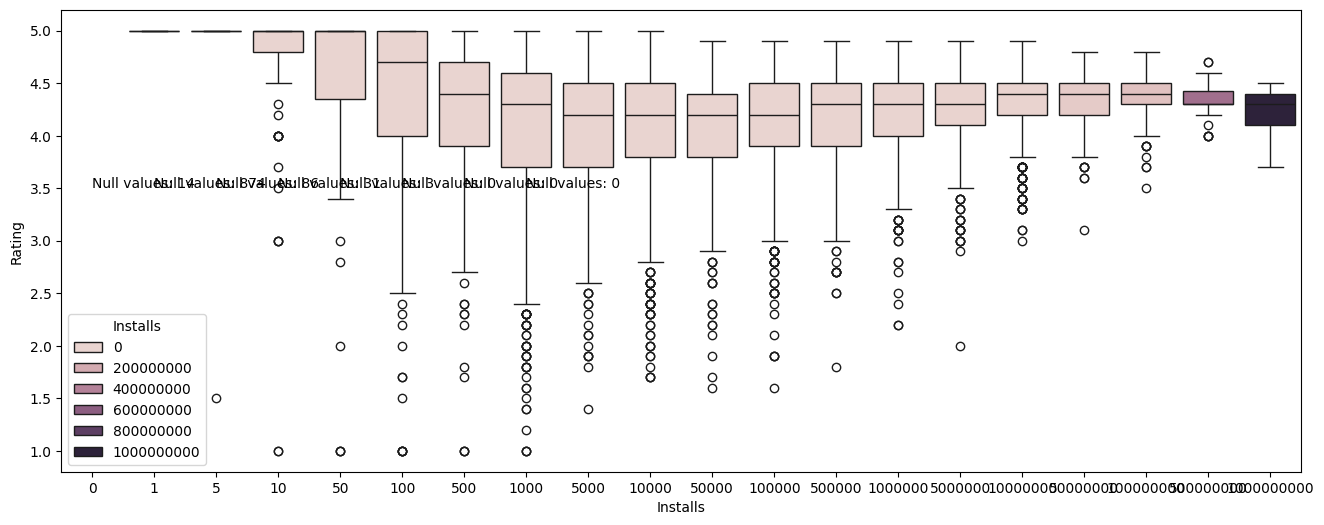

In [108]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs', y='Rating', hue='Installs', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

In [109]:
# in which Install_category the Rating has NaN values
df['Installs'].loc[df['Reviews'].isnull()].value_counts()

Series([], Name: count, dtype: int64)

- There are no Null values in Reviews

<Axes: xlabel='Installs', ylabel='Reviews'>

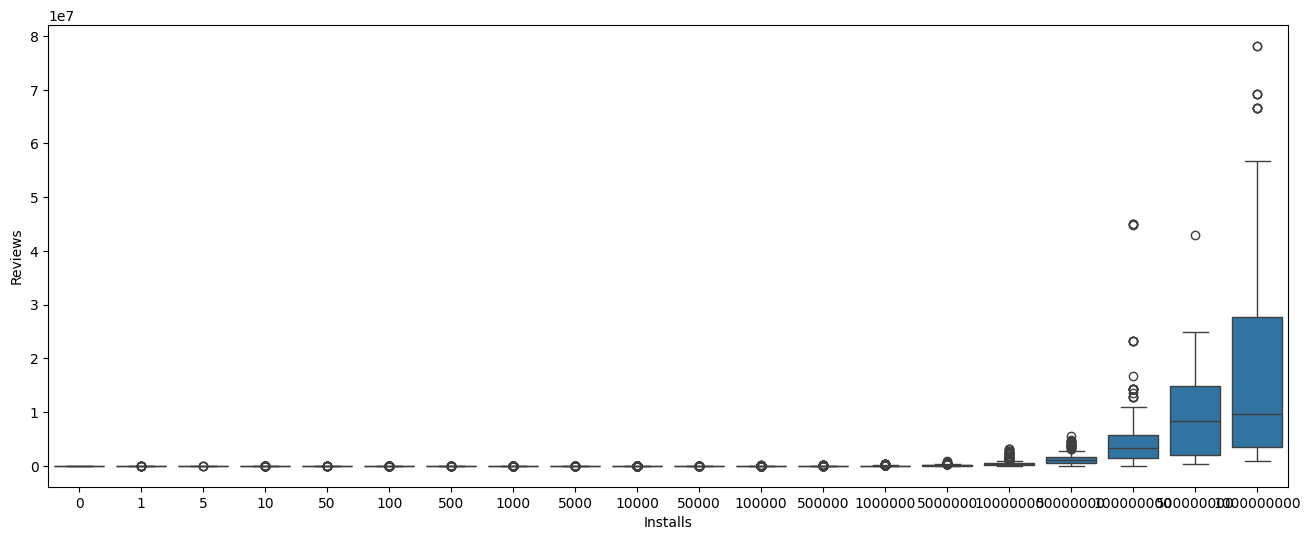

In [110]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs', y= 'Reviews', data=df) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs', ylabel='Reviews'>

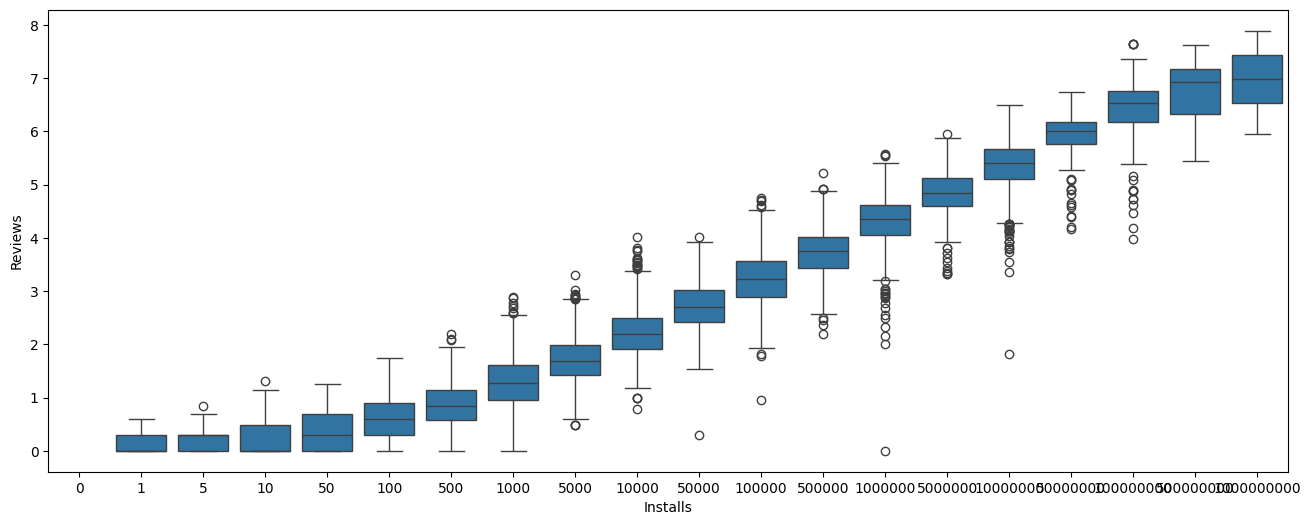

In [113]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs', y= np.log10(df['Reviews']), data=df) # plot the boxplot

- We also draw the scatter plot of the Rating and Review columns with the Installs column

<Axes: xlabel='Rating', ylabel='Reviews'>

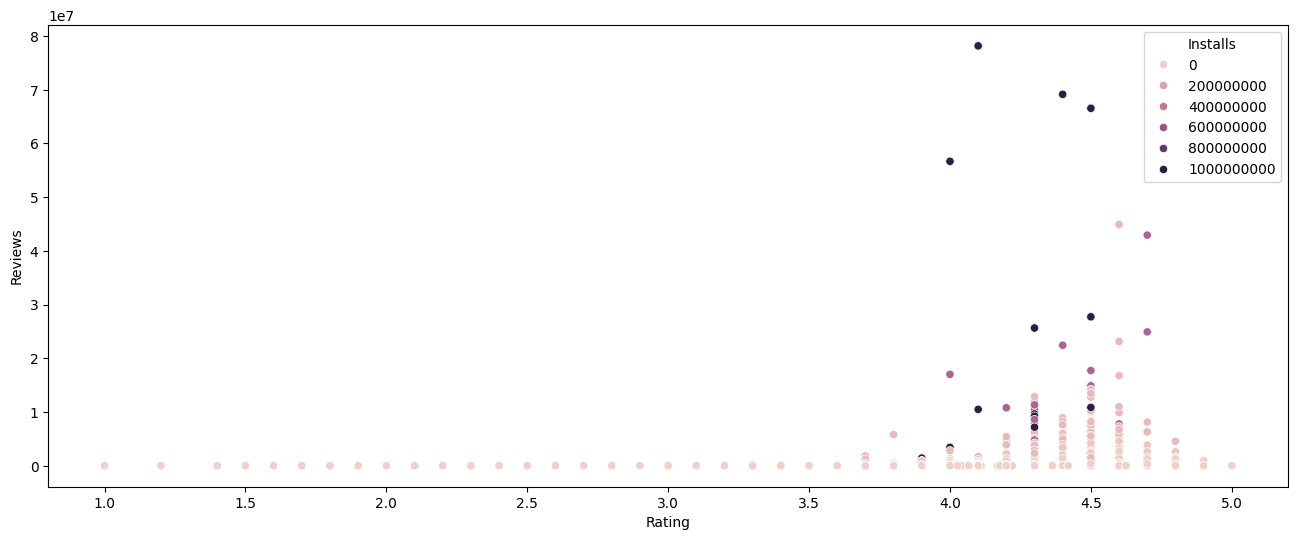

In [114]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs', data=df) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

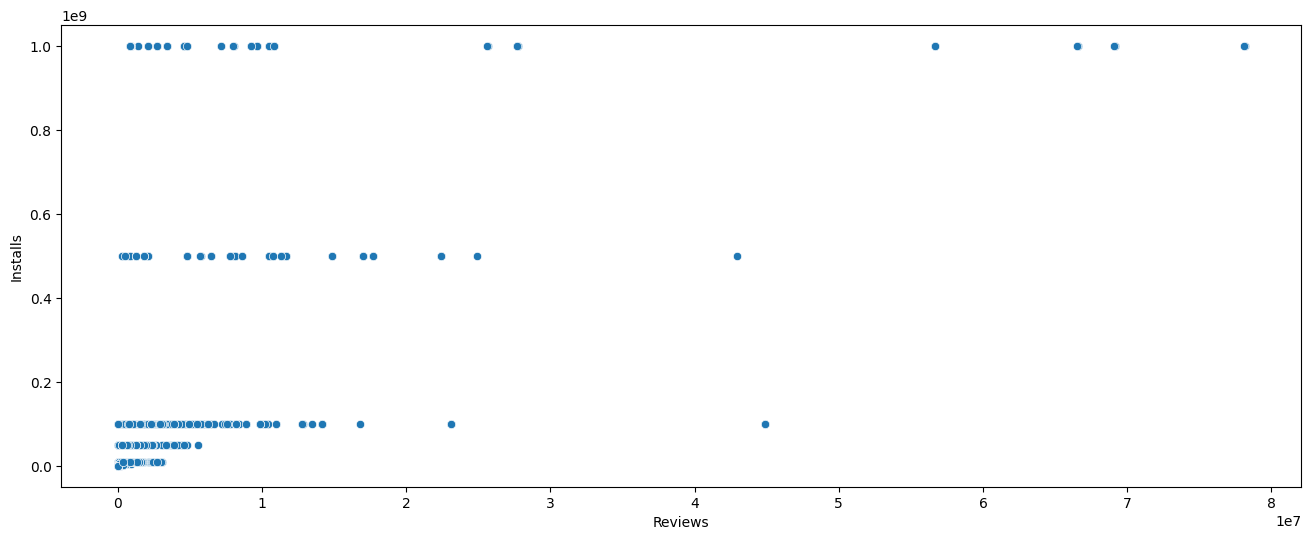

In [115]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

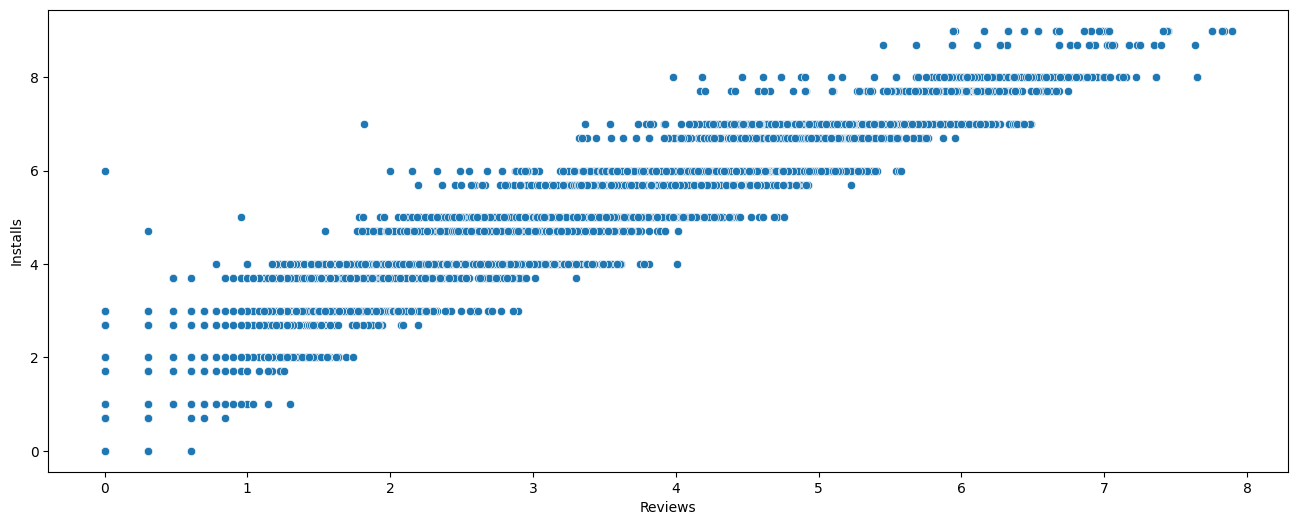

In [116]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

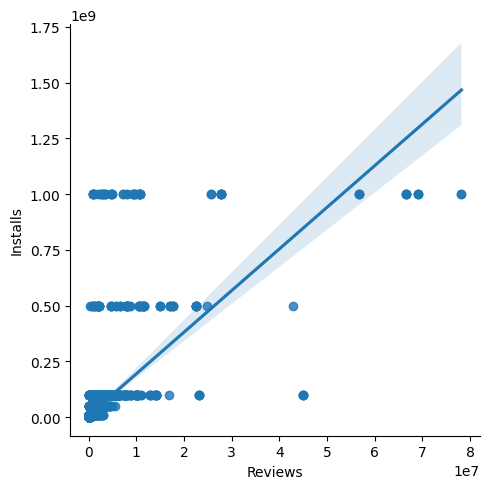

In [117]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

# Observation

- We can see that most of the null values from Rating column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

# 2.3. Duplicates

- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [118]:
# find duplicate if any
df.duplicated().sum()

np.int64(483)

- This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [119]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?
- let's check for number of duplicates in each column using a for loop and printing the output

In [120]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10777
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10788
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373


- This means that the only better way to find duplicates is to check for whole data

In [121]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [122]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000
2543,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000
2322,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000
3083,365Scores - Live Scores,SPORTS,4.600000,666521,26214400.0,10000000,Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000
5415,365Scores - Live Scores,SPORTS,4.600000,666246,26214400.0,10000000,Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000


- Remove Duplicates

In [123]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [124]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

# 3. Insights from Data

# 3.1. Which category has the highest number of apps?

In [125]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# 3.2. Which category has the highest number of installs?

In [126]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# 3.3. Which category has the highest number of reviews?

In [127]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# 3.4. Which category has the highest rating?

In [128]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.414972
EDUCATION              4.373925
ART_AND_DESIGN         4.367249
BOOKS_AND_REFERENCE    4.361886
PERSONALIZATION        4.350716
HEALTH_AND_FITNESS     4.288472
GAME                   4.285692
SOCIAL                 4.266830
SPORTS                 4.266504
PARENTING              4.260079
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

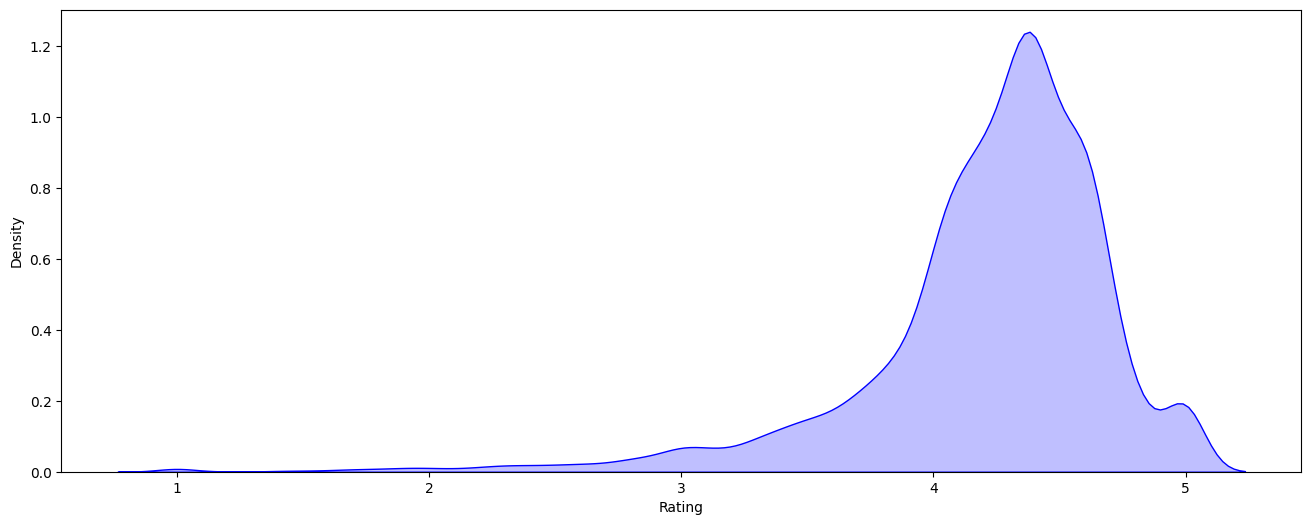

In [129]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

# Very Important for All

# Assignment:

Make at least 15 Questions and Inspect the data find the answers and plot the graphs

In [130]:
df.head(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7


In [133]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb'],
      dtype='object')

In [134]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,10332.000000,1.034600e+04,8.821000e+03,1.034600e+04,10346.000000,8821.000000
mean,4.215527,4.063338e+05,2.234121e+07,1.417266e+07,0.966171,21.306240
std,0.497616,2.698179e+06,2.364101e+07,8.028090e+07,16.235418,22.545826
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.066292,3.200000e+01,4.928307e+06,1.000000e+03,0.000000,4.700000
50%,4.300000,1.688500e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,4.659825e+04,3.040870e+07,1.000000e+06,0.000000,29.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


# Examples

<Axes: xlabel='Installs', ylabel='Price'>

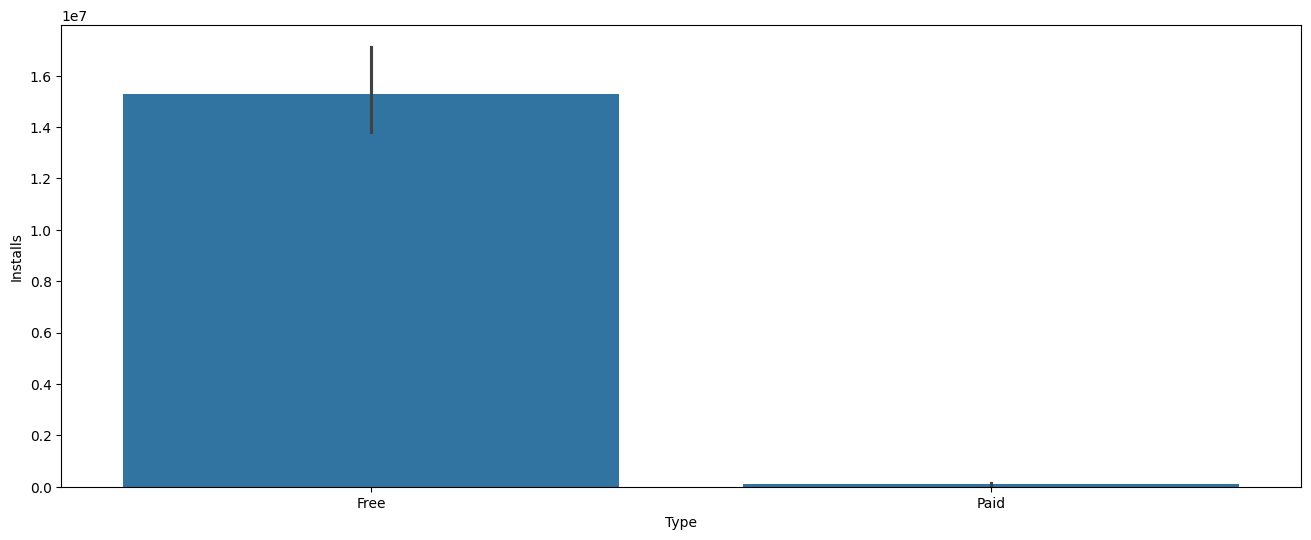

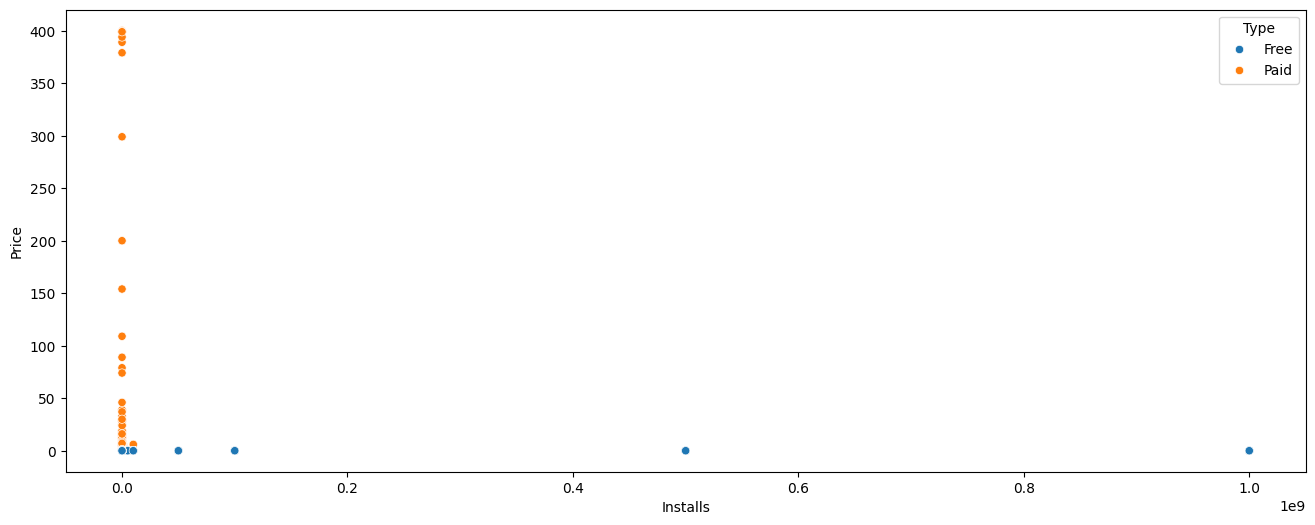

In [135]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

<Axes: xlabel='Installs', ylabel='Size_in_Mb'>

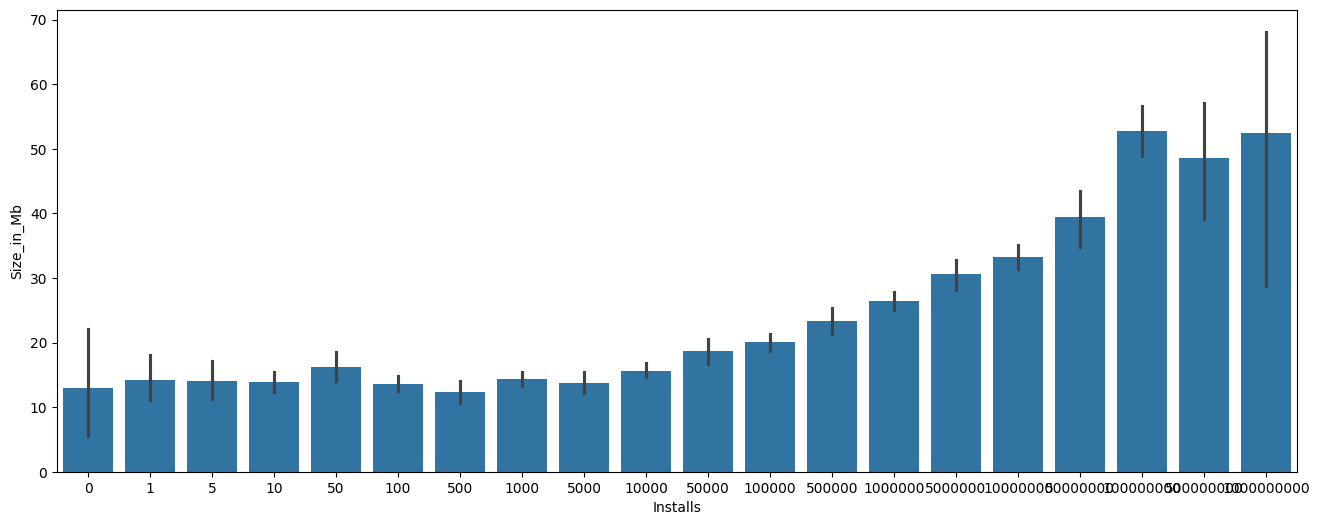

In [137]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs', y='Size_in_Mb', data=df) # plot the bar plot

In [138]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

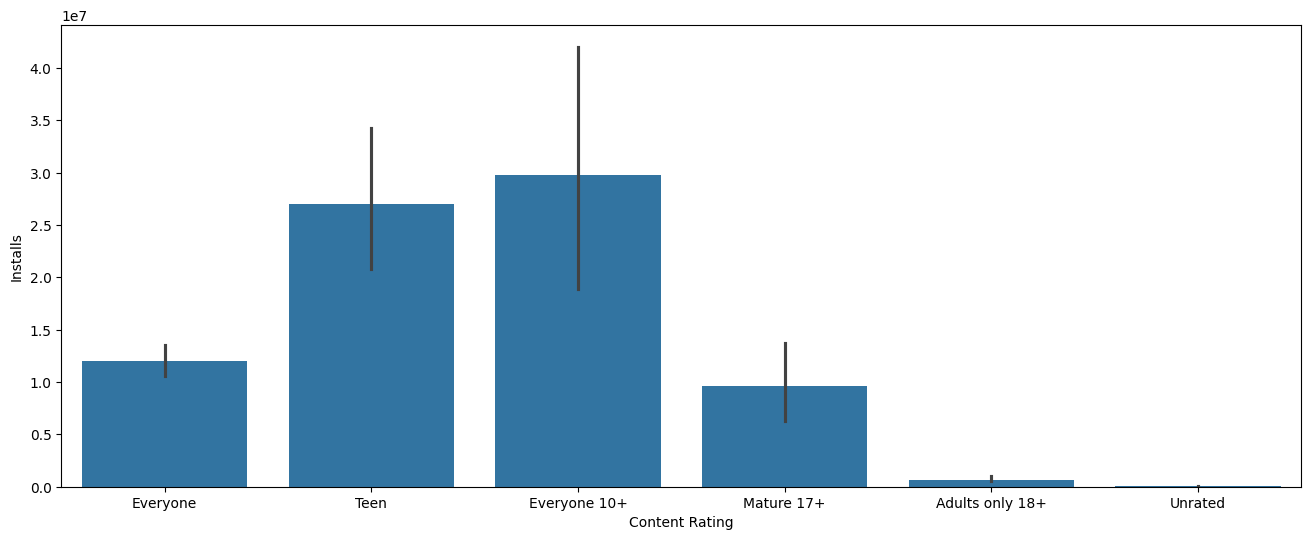

In [139]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [140]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
HOUSE_AND_HOME           78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

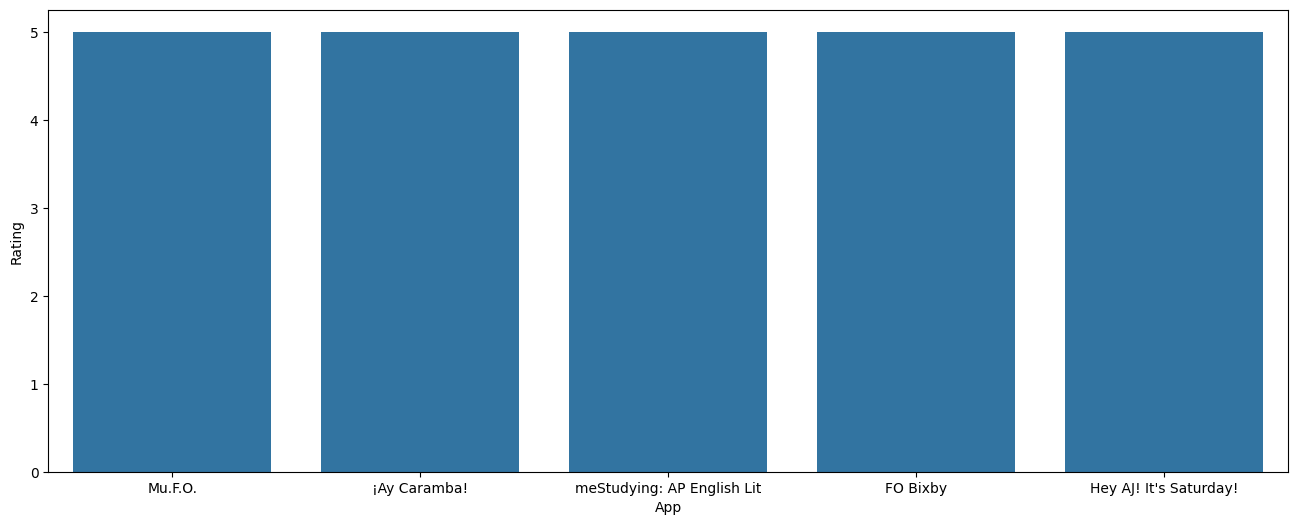

In [141]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [142]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
10697,Mu.F.O.,GAME,5.0,2,16777216.0,1,Paid,0,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,16.000000
5832,¡Ay Caramba!,FAMILY,5.0,0,562176.0,1,Paid,1,Everyone,Education,"June 13, 2014",1.2,3.0 and up,0.536133
5482,meStudying: AP English Lit,FAMILY,5.0,1,670720.0,10,Paid,4,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,0.639648
10690,FO Bixby,PERSONALIZATION,5.0,5,881664.0,100,Paid,0,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up,0.840820
5237,Hey AJ! It's Saturday!,BOOKS_AND_REFERENCE,5.0,12,52428800.0,100,Paid,3,Everyone,Books & Reference,"June 13, 2016",1.0.0,2.2 and up,50.000000


<Axes: xlabel='App', ylabel='Rating'>

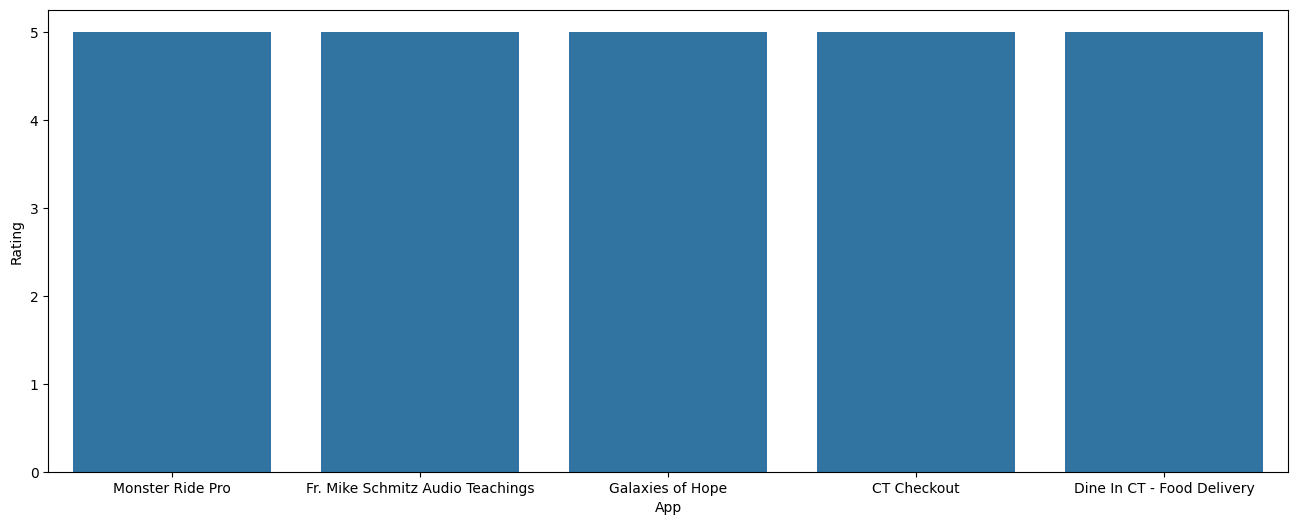

In [143]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [144]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
10776,Monster Ride Pro,GAME,5.0,1,25165824.0,10,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,24.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3.6
2452,Galaxies of Hope,MEDICAL,5.0,2,25165824.0,50,Free,0,Everyone,Medical,"July 27, 2018",1.0,4.1 and up,24.0
7896,CT Checkout,FINANCE,5.0,1,8808038.4,50,Free,0,Everyone,Finance,"April 20, 2017",1.2,4.2 and up,8.4
7895,Dine In CT - Food Delivery,SHOPPING,5.0,4,1677721.6,1000,Free,0,Everyone,Shopping,"May 16, 2016",1.3,4.0 and up,1.6


<Axes: xlabel='App', ylabel='Reviews'>

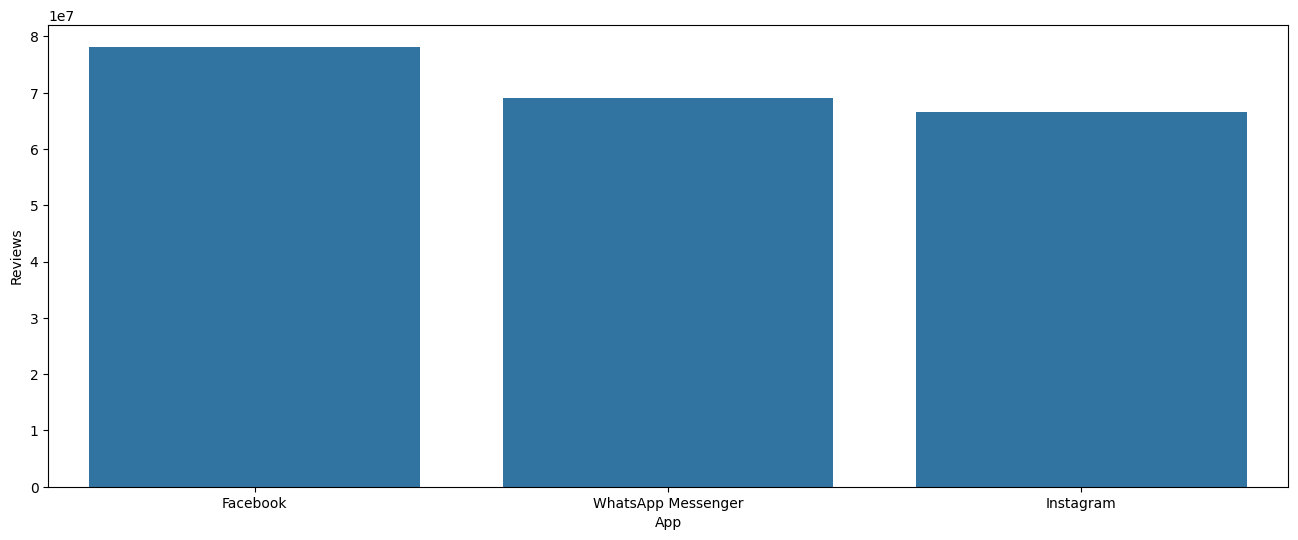

In [145]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [146]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN


<Axes: xlabel='App', ylabel='Reviews'>

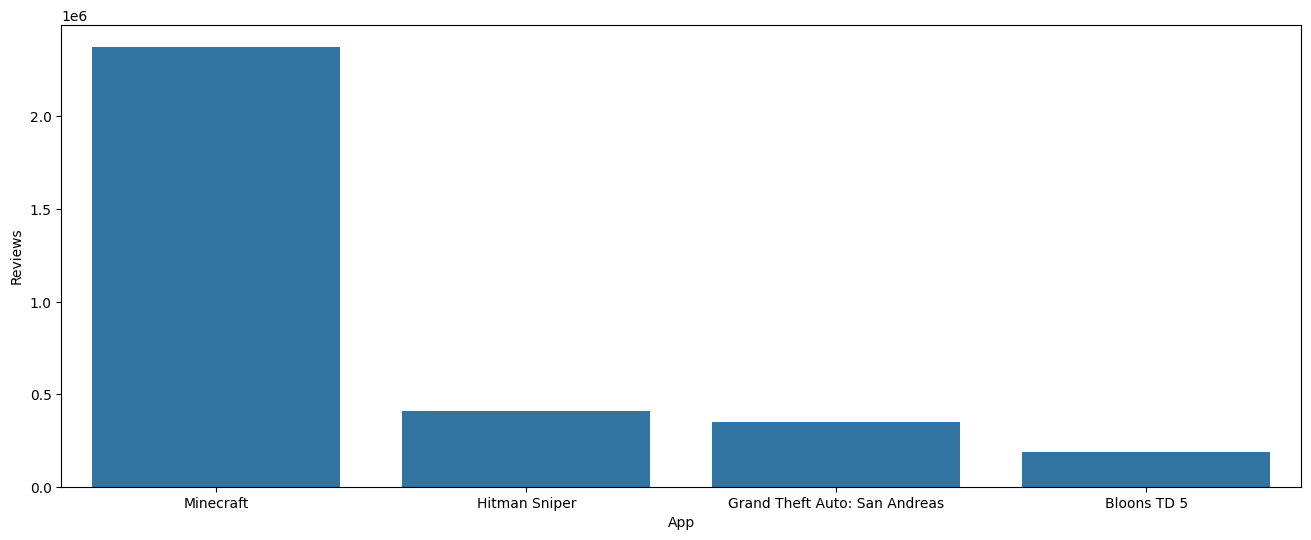

In [147]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot